In [1]:
import numpy as np
import matplotlib.pylab as plt
swe_data = np.log10(np.load("./0.05.npy"))
data = np.load("./0.05.npy")

data = np.load("./initial.npy")
#data = np.load("./Zeldotest.np.npy")


/Users/dongxiaofeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
#img = data[0]
img = data

In [3]:
img.shape

(128, 128)

In [4]:
overdensity = img - np.ones(img.shape[0],dtype=float)*np.average(img)
print(overdensity.shape)

fft = np.fft.fft2(overdensity)


flat = fft.flatten()

print(flat.shape)

freqs = np.fft.fftfreq(img.shape[0])
freqs.shape
#print(freqs)

(128, 128)
(16384,)


(128,)

In [5]:
print(img)
print(overdensity)

[[ -6.17458778   0.03098235   0.31807154 ...  -3.6235671   -5.50615581
   -5.34719137]
 [  1.04250499  -2.63780661  -0.3296767  ...  -3.57441061  -3.63885846
   -3.73679963]
 [ -5.11697236  -5.40753432  -0.28850905 ...  -1.42805118  -3.76817445
   -5.19807857]
 ...
 [ -6.65245684 -10.32476307  -6.21330046 ...  -7.12095685  -3.66022678
   -3.04018141]
 [-13.55494559 -11.32570433  -7.93730965 ...  -6.92631772  -2.01610771
   -4.18839685]
 [-11.06801055  -8.81375723  -3.16941377 ...  -1.74637122  -0.04611819
   -8.12061624]]
[[ -6.17458778   0.03098235   0.31807154 ...  -3.6235671   -5.50615581
   -5.34719137]
 [  1.04250499  -2.63780661  -0.3296767  ...  -3.57441061  -3.63885846
   -3.73679963]
 [ -5.11697236  -5.40753432  -0.28850905 ...  -1.42805118  -3.76817445
   -5.19807857]
 ...
 [ -6.65245684 -10.32476307  -6.21330046 ...  -7.12095685  -3.66022678
   -3.04018141]
 [-13.55494559 -11.32570433  -7.93730965 ...  -6.92631772  -2.01610771
   -4.18839685]
 [-11.06801055  -8.81375723  -3.

In [6]:

#### This is useless now #######
def cal_distance(dim,i,j):
    x_coord_1 = i - dim*int(i/dim)
    y_coord_1 = int(i/dim)
    
    x_coord_2 = j - dim*int(j/dim)  
    y_coord_2 = int(j/dim)    
    
    distance = np.sqrt((x_coord_1-x_coord_2)**2+(y_coord_1-y_coord_2)**2)

    return distance

In [7]:
cal_distance(128,1,1000)

103.23759005323593

[[2.55795385e-13 4.06936950e-13 4.09167683e+03 ... 7.03678619e+03
  4.09167683e+03 4.88985578e-13]
 [1.27105749e-13 1.21417596e-13 8.31779060e+03 ... 3.68224191e+03
  2.82253626e+03 1.31017607e-13]
 [9.53289110e+03 1.67814059e+04 6.11840737e+03 ... 4.16521336e+03
  8.02375671e+03 1.00173429e+04]
 ...
 [4.80463272e+03 2.60076341e+03 8.66136974e+03 ... 3.35395591e+03
  9.85902093e+02 4.42424186e+03]
 [9.53289110e+03 1.00173429e+04 8.02375671e+03 ... 4.31468000e+03
  6.11840737e+03 1.67814059e+04]
 [2.00971835e-13 1.72882509e-13 2.82253626e+03 ... 4.74315735e+03
  8.31779060e+03 4.37777368e-13]]
[[-2.55795385e-13+0.00000000e+00j  8.52651283e-14-3.97903932e-13j
   2.90428208e+03+2.88218058e+03j ... -3.82216651e+03+5.90824873e+03j
   2.90428208e+03-2.88218058e+03j  3.97903932e-13+2.84217094e-13j]
 [ 5.68434189e-14+1.13686838e-13j -1.13686838e-13-4.26325641e-14j
   2.20481789e+03-8.02025053e+03j ...  2.97453565e+03-2.17049376e+03j
   1.48793842e+03-2.39848914e+03j -1.27897692e-13+2.84217094e

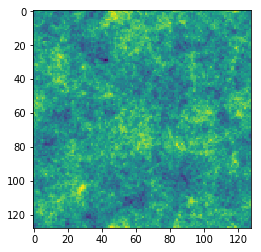

In [8]:
plt.imshow((overdensity))
#plt.imshow(np.absolute(fft))
print(np.absolute(fft))
print(fft)

image dimension = 128
power spectrum binning=2.262741699796952


/Users/dongxiaofeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


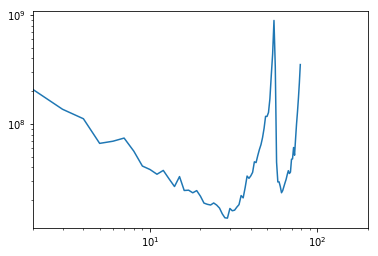

In [9]:
dim = img.shape[0]
print("image dimension = " + str(dim))

bin_dim = 80
binning = dim*np.sqrt(2)/bin_dim
print("power spectrum binning="+str(binning))


pow_spec = np.zeros(bin_dim)


#for i in range(0,dim):
#    for j in range(0,dim): #  for j in range(i+1,dim):
#        distance = cal_distance(dim,i,j)
        
#        if int(distance/binning)> (bin_dim-1) :
#            print("distance="+ str(distance) + ",error!")
#        else :
#            pow_spec[int(distance/binning)]+=flat[i]*np.conj(flat[j])
#            #print(flat[i]*np.conj(flat[j]))
#plt.figure()
#plt.plot(pow_spec)
 

    
for i in range(0,dim):
    for j in range(0,dim):
          distance = np.sqrt(i**2+j**2)
          
          if int(distance/binning)> (bin_dim-1) :  
                print("distance="+ str(distance) + ",error!")
          else:
                pow_spec[int(distance/binning)]+=fft[i][j]*np.conj(fft[i][j])
plt.figure()
plt.xlim(2,200)             

plt.loglog(pow_spec)

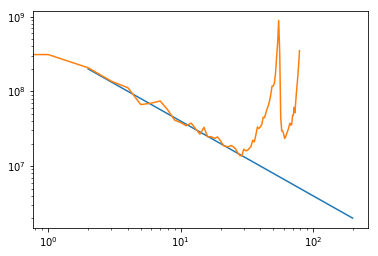

In [10]:
k = np.arange(2, 200)
n = -1.0
A = 4e8
pk = A*(k**n)
plt.plot(k, pk)
plt.xscale('log')
plt.yscale('log')
plt.loglog(pow_spec)
plt.show()

(16384,)
image dimension = 128
power spectrum binning=2.262741699796952


/Users/dongxiaofeng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part


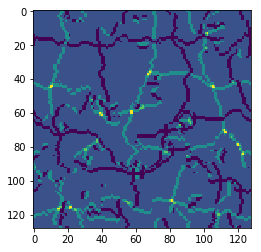

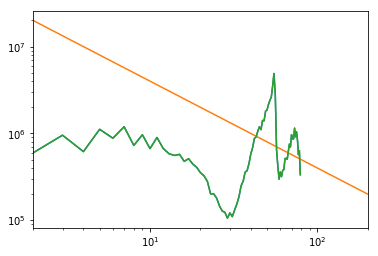

(16384,)
image dimension = 128
power spectrum binning=2.262741699796952


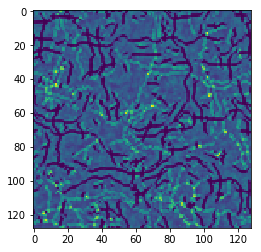

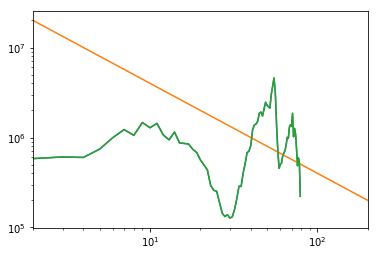

(16384,)
image dimension = 128
power spectrum binning=2.262741699796952


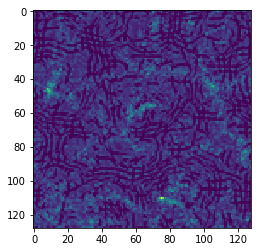

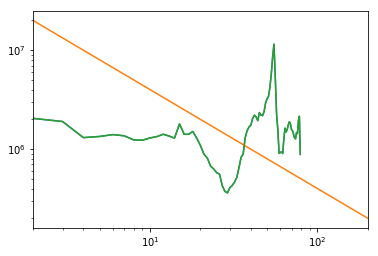

(16384,)
image dimension = 128
power spectrum binning=2.262741699796952


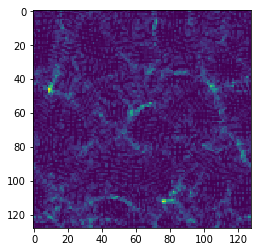

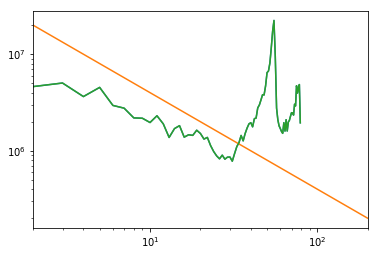

(16384,)
image dimension = 128
power spectrum binning=2.262741699796952


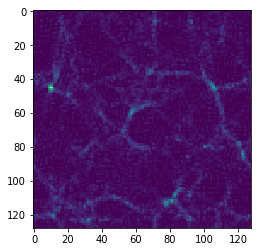

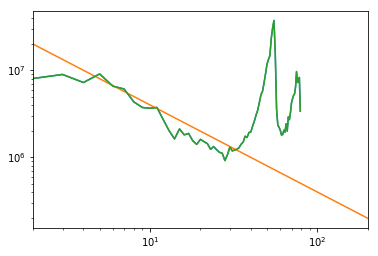

(16384,)
image dimension = 128
power spectrum binning=2.262741699796952


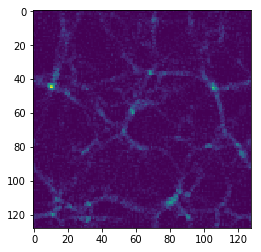

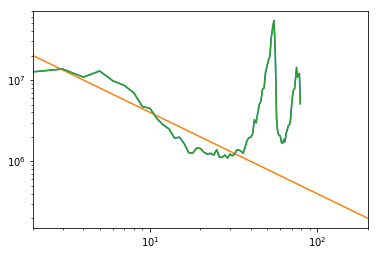

(16384,)
image dimension = 128
power spectrum binning=2.262741699796952


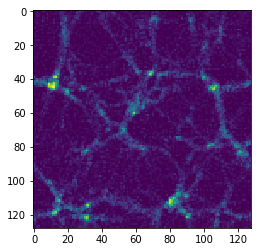

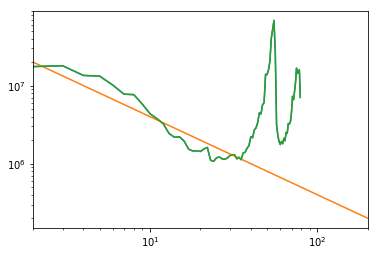

(16384,)
image dimension = 128
power spectrum binning=2.262741699796952


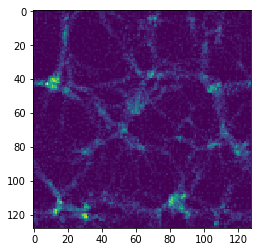

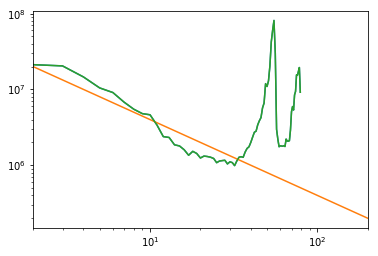

(16384,)
image dimension = 128
power spectrum binning=2.262741699796952


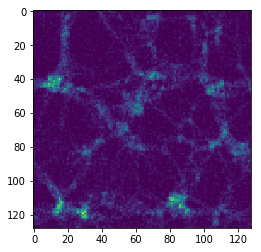

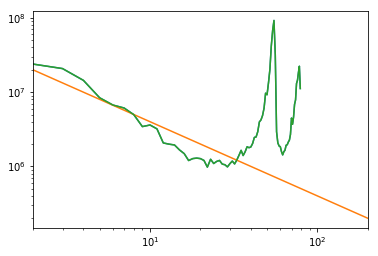

(16384,)
image dimension = 128
power spectrum binning=2.262741699796952


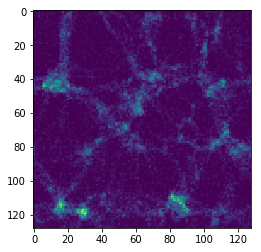

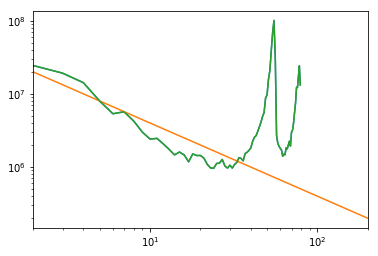

In [17]:
for k in range(10):
    data = np.load("./num_" + str(k) + ".npy")
    img = data[0]
    plt.figure()
    plt.imshow(img)
    
    overdensity = img - np.ones(img.shape[0],dtype=float)*np.average(img)
    #print(overdensity.shape)
    
    fft = np.fft.fft2(overdensity)
    flat = fft.flatten()

    print(flat.shape)

    freqs = np.fft.fftfreq(img.shape[0])
    freqs.shape
    
    dim = img.shape[0]
    print("image dimension = " + str(dim))

    bin_dim = 80
    binning = dim*np.sqrt(2)/bin_dim
    print("power spectrum binning="+str(binning))
    pow_spec = np.zeros(bin_dim)


    for i in range(0,dim):
        for j in range(0,dim):
              distance = np.sqrt(i**2+j**2)
          
              if int(distance/binning)> (bin_dim-1) :  
                    print("distance="+ str(distance) + ",error!")
              else:
                    pow_spec[int(distance/binning)]+=fft[i][j]*np.conj(fft[i][j])
    plt.figure()
    plt.xlim(2,200)             

    plt.loglog(pow_spec)
    k = np.arange(2, 200)
    n = -1.0
    A = 4e7
    pk = A*(k**n)
    plt.plot(k, pk)
    plt.xscale('log')
    plt.yscale('log')
    plt.loglog(pow_spec)
    plt.show()
    #plt.save("pow_spec_"+str(k)+".png")